# Get avg new tests per day and rate of increase of total tests (over 3 MO period starting from first (i.e. min) gov response

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import time

# %matplotlib inline
%matplotlib notebook

In [2]:
# load files
merged_covid = pd.read_csv("merged_covid_FINAL.csv")
GRO = pd.read_csv("govRespOutcomes.csv")

display(merged_covid)
merged_covid.columns

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766.0,584.800,41.2,2.0,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766.0,584.800,41.2,0.0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,55.0,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,41.0,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,96.0,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927.0,42.729,19.6,18.0,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [3]:
# df with just tests, dates, and identifiers
tests_df = merged_covid[['location','date_updated','new_tests','total_tests_updated']]
display(tests_df)
tests_df['date_updated'] = pd.to_datetime(tests_df['date_updated'])
display(tests_df.dtypes)

,location,date_updated,new_tests,total_tests_updated
0,Aruba,2020-03-13,0.0,0.0
1,Aruba,2020-03-19,0.0,0.0
2,Aruba,2020-03-20,0.0,0.0
3,Aruba,2020-03-21,0.0,0.0
4,Aruba,2020-03-22,0.0,0.0
...,...,...,...,...
32272,Zimbabwe,2020-08-27,951.0,95721.0
32273,Zimbabwe,2020-08-28,1551.0,97272.0
32274,Zimbabwe,2020-08-29,0.0,97272.0
32275,Zimbabwe,2020-08-30,0.0,97272.0


<ipython-input-3-5c7751088ec2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tests_df['date_updated'] = pd.to_datetime(tests_df['date_updated'])


location                       object
date_updated           datetime64[ns]
new_tests                     float64
total_tests_updated           float64
dtype: object

In [4]:
# need date of first gov response & date 3 MO later
display(GRO)
print(GRO.columns)

# make series for date of first gov response & date 3 MO later
date_minGR = GRO['date_minGR']
date_3mnth = GRO['date_3mnthAfter']
population = GRO['population']
population

,primary_key,country,iso_code,population,population_density,median_age,gdp_per_capita,date_minGR,date_maxGR,date_firstNC,...,E1_Flag,E2_Debt/contract relief,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H5_Investment in vaccines,E3_Fiscal measures,E4_International support,H4_Emergency investment in healthcare
0,AFG2020-08-31,Afghanistan,AFG,38928341.0,54.422,18.6,NaN,2020-03-01,2020-04-12,2020-02-25,...,0.0,0.0,2.0,1.0,3.0,2.0,0.0,5.277119e+08,39400000.0,248977750.0
1,ALB2020-08-31,Albania,ALB,2877800.0,104.871,38.0,NaN,2020-03-09,2020-05-26,2020-03-09,...,1.0,2.0,2.0,1.0,2.0,2.0,0.0,3.997589e+08,0.0,26000000.0
2,DZA2020-08-31,Algeria,DZA,43851043.0,17.348,29.1,NaN,2020-03-12,2020-08-08,2020-02-26,...,0.0,2.0,2.0,1.0,1.0,2.0,0.0,7.155345e+08,0.0,326000000.0
3,AGO2020-08-31,Angola,AGO,32866268.0,23.890,16.8,NaN,2020-03-24,2020-04-09,2020-03-22,...,1.0,2.0,2.0,1.0,2.0,1.0,0.0,9.000000e+06,0.0,240000000.0
4,ARG2020-08-31,Argentina,ARG,45195777.0,16.177,31.9,NaN,2020-03-04,2020-03-25,2020-03-04,...,1.0,2.0,2.0,1.0,1.0,2.0,0.0,1.054084e+10,0.0,73000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,VEN2020-08-31,Venezuela,VEN,28435943.0,36.253,29.0,NaN,2020-03-15,2020-06-22,2020-03-15,...,0.0,2.0,2.0,1.0,3.0,0.0,0.0,0.000000e+00,0.0,10000002.0
160,VNM2020-08-31,Vietnam,VNM,97338583.0,308.127,32.6,6171.884,2020-01-29,2020-04-09,2020-01-24,...,1.0,1.0,2.0,1.0,3.0,2.0,0.0,1.786000e+10,60050.0,86180.0
161,YEM2020-08-31,Yemen,YEM,29825968.0,53.508,20.3,NaN,2020-04-10,2020-05-01,2020-04-10,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
162,ZMB2020-08-31,Zambia,ZMB,18383956.0,22.995,17.7,NaN,2020-03-19,2020-05-02,2020-03-19,...,0.0,1.0,2.0,1.0,1.0,2.0,0.0,5.729560e+08,0.0,38360000.0


Index(['primary_key', 'country', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'date_minGR',
       'date_maxGR', 'date_firstNC', 'date_maxNC', 'date_maxND',
       'date_3mnthAfter', 'interval_GRRamp', 'interval_GRToFirstNC',
       'interval_firstNCToMaxNC', 'interval_firstNCToMaxND',
       'interval_maxNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'mobil_residential', 'mobil_outdoors',
       'mobil_retailRecreation', 'mobil_parks', 'mobil_GroceryPharmacy',
       'mobil_transitStations', 'mobil_workplaces', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 

0      38928341.0
1       2877800.0
2      43851043.0
3      32866268.0
4      45195777.0
          ...    
159    28435943.0
160    97338583.0
161    29825968.0
162    18383956.0
163    14862927.0
Name: population, Length: 164, dtype: float64

In [5]:
# make list of countries and length of list
countries = tests_df['location'].unique()
len(countries)

164

In [6]:
# for loop: get dates only from date of first gov response to 3 MO later
countryLoc_list = []

for i in range(0,164):
    country = countries[i]
    countryLoc = tests_df.loc[tests_df['location'] == country]
    datesAfterMin = countryLoc[(countryLoc['date_updated'] > date_minGR[i])]
    datesBefore3mnth = datesAfterMin[(datesAfterMin['date_updated'] <= date_3mnth[i])]
    if not datesBefore3mnth.empty:
        countryLoc_list.append(datesBefore3mnth)
        test3mnth_df = pd.concat(countryLoc_list)

display(test3mnth_df)  

,location,date_updated,new_tests,total_tests_updated
0,Aruba,2020-03-13,0.0,0.0
1,Aruba,2020-03-19,0.0,0.0
2,Aruba,2020-03-20,0.0,0.0
3,Aruba,2020-03-21,0.0,0.0
4,Aruba,2020-03-22,0.0,0.0
...,...,...,...,...
32139,Zimbabwe,2020-04-16,0.0,0.0
32140,Zimbabwe,2020-04-17,0.0,0.0
32141,Zimbabwe,2020-04-18,0.0,0.0
32142,Zimbabwe,2020-04-19,0.0,0.0


In [7]:
# convert dates back to string
test3mnth_df['date_updated'] = test3mnth_df['date_updated'].astype(str)
test3mnth_df.dtypes

datesDT = test3mnth_df['date_updated']
datesDT

datesUE = []

for date in datesDT:
    pattern = '%Y-%m-%d'
    epoch = int(time.mktime(time.strptime(date, pattern)))
    datesUE.append(epoch)

test3mnth_df['date_UE'] = datesUE

# check df
display(test3mnth_df)
test3mnth_df.isnull().sum()

,location,date_updated,new_tests,total_tests_updated,date_UE
0,Aruba,2020-03-13,0.0,0.0,1584079200
1,Aruba,2020-03-19,0.0,0.0,1584597600
2,Aruba,2020-03-20,0.0,0.0,1584684000
3,Aruba,2020-03-21,0.0,0.0,1584770400
4,Aruba,2020-03-22,0.0,0.0,1584856800
...,...,...,...,...,...
32139,Zimbabwe,2020-04-16,0.0,0.0,1587016800
32140,Zimbabwe,2020-04-17,0.0,0.0,1587103200
32141,Zimbabwe,2020-04-18,0.0,0.0,1587189600
32142,Zimbabwe,2020-04-19,0.0,0.0,1587276000


location               0
date_updated           0
new_tests              0
total_tests_updated    0
date_UE                0
dtype: int64

In [8]:
# for loop to get slope (rate of increase of total tests) over the 3 MO
slope_list = []

for country in countries:   
    countryLoc = test3mnth_df.loc[test3mnth_df['location'] == country]
    if not countryLoc.empty:
        x_values = countryLoc['date_UE']
        y_values = countryLoc['total_tests_updated']

        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        slope_list.append(slope)
    else:
        slope_list.append(0)

# list of slopes over the 3 MO
display(slope_list)
len(slope_list)

/Users/patricialan/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/patricialan/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/patricialan/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


[0.0,
 0.0,
 0.0,
 0.0,
 0.08856311188325287,
 0.009811855877616748,
 0.0,
 0.012526069868082941,
 0.0,
 0,
 0.03859807892702338,
 0.0,
 0,
 3.472222222222222e-05,
 0.0131601084538376,
 0.023950052527499693,
 0.0,
 0.014943301198862934,
 0.0,
 0.0024309907098422115,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0.18616642300194933,
 0,
 0.05338225600461418,
 0.0,
 0.0018642601862151362,
 0.0,
 0,
 0.0,
 0.02003492713562158,
 0.0,
 0.0028993312757201652,
 0.001028500074628457,
 0.0,
 0.04565746662958843,
 0.383963225236737,
 0.0,
 0.010579854579795638,
 0.0,
 0.0,
 0.0035736536329931583,
 nan,
 0.0,
 0.4526981368186874,
 0.007475149782135078,
 0.0015383699243852504,
 0.019899612479382215,
 0.0,
 0,
 0.0,
 0.20513677233963665,
 0.0,
 0,
 0.0,
 0.0,
 0.01922338606682322,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0018955625272643142,
 0.0,
 0.00712025012025012,
 0.0,
 0.006312456730057185,
 0.00341692393214409,
 0.0,
 0.0,
 0.0023551266702050897,
 0.00047969966629588434,
 0.0,
 0,
 0.0,
 0.03706563068521234,


164

In [9]:
# find avg new tests / day (as percent of population)
display(test3mnth_df)

meanNewTests_list = []

for country in countries:
    countryLoc = test3mnth_df.loc[test3mnth_df['location'] == country]
    mean_newTests = countryLoc['new_tests'].mean()
    meanNewTests_list.append(mean_newTests)

# list of mean of new tests per day over 3 MO
print(len(meanNewTests_list))

d = {'value_newTestsMean':meanNewTests_list, 'population':population, 'value_totTestsSlope':slope_list}

# join with population
newTests_df = pd.DataFrame(data=d)
newTests_df
newTests_df['percent_newTestsMean'] = newTests_df['value_newTestsMean'] / newTests_df['population']
print(newTests_df.isnull().sum())
newTests_df = newTests_df.fillna(0)
display(newTests_df.isnull().sum())

display(newTests_df)
percent_newTestsMean = newTests_df['percent_newTestsMean']
percent_newTestsMean

# add to GRO df
GRO['percent_newTestsMean'] = percent_newTestsMean
GRO['value_totTestsSlope'] = newTests_df['value_totTestsSlope']
print(GRO.columns)

# reorganize GRO df
columns = ['primary_key', 'country', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'date_minGR',
       'date_maxGR', 'date_firstNC', 'date_maxNC', 'date_maxND',
       'date_3mnthAfter', 'interval_GRRamp', 'interval_GRToFirstNC',
       'interval_firstNCToMaxNC', 'interval_firstNCToMaxND',
       'interval_maxNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean','value_totTestsSlope', 'mobil_residential', 'mobil_outdoors',
       'mobil_retailRecreation', 'mobil_parks', 'mobil_GroceryPharmacy',
       'mobil_transitStations', 'mobil_workplaces', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'H1_Public information campaigns', 'H1_Flag',
       'H2_Testing policy', 'H3_Contact tracing', 'H5_Investment in vaccines',
       'E3_Fiscal measures', 'E4_International support',
       'H4_Emergency investment in healthcare']

GRO_tidy = GRO[columns]
GRO_tidy.columns

,location,date_updated,new_tests,total_tests_updated,date_UE
0,Aruba,2020-03-13,0.0,0.0,1584079200
1,Aruba,2020-03-19,0.0,0.0,1584597600
2,Aruba,2020-03-20,0.0,0.0,1584684000
3,Aruba,2020-03-21,0.0,0.0,1584770400
4,Aruba,2020-03-22,0.0,0.0,1584856800
...,...,...,...,...,...
32139,Zimbabwe,2020-04-16,0.0,0.0,1587016800
32140,Zimbabwe,2020-04-17,0.0,0.0,1587103200
32141,Zimbabwe,2020-04-18,0.0,0.0,1587189600
32142,Zimbabwe,2020-04-19,0.0,0.0,1587276000


164
value_newTestsMean      22
population               0
value_totTestsSlope      2
percent_newTestsMean    22
dtype: int64


value_newTestsMean      0
population              0
value_totTestsSlope     0
percent_newTestsMean    0
dtype: int64

,value_newTestsMean,population,value_totTestsSlope,percent_newTestsMean
0,0.0,38928341.0,0.000000,0.000000
1,0.0,2877800.0,0.000000,0.000000
2,0.0,43851043.0,0.000000,0.000000
3,0.0,32866268.0,0.000000,0.000000
4,8551.9,45195777.0,0.088563,0.000189
...,...,...,...,...
159,1815.0,28435943.0,0.054348,0.000064
160,0.0,97338583.0,0.000000,0.000000
161,8943.6,29825968.0,0.104640,0.000300
162,0.0,18383956.0,0.000000,0.000000


Index(['primary_key', 'country', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'date_minGR',
       'date_maxGR', 'date_firstNC', 'date_maxNC', 'date_maxND',
       'date_3mnthAfter', 'interval_GRRamp', 'interval_GRToFirstNC',
       'interval_firstNCToMaxNC', 'interval_firstNCToMaxND',
       'interval_maxNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'mobil_residential', 'mobil_outdoors',
       'mobil_retailRecreation', 'mobil_parks', 'mobil_GroceryPharmacy',
       'mobil_transitStations', 'mobil_workplaces', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 

Index(['primary_key', 'country', 'iso_code', 'population',
       'population_density', 'median_age', 'gdp_per_capita', 'date_minGR',
       'date_maxGR', 'date_firstNC', 'date_maxNC', 'date_maxND',
       'date_3mnthAfter', 'interval_GRRamp', 'interval_GRToFirstNC',
       'interval_firstNCToMaxNC', 'interval_firstNCToMaxND',
       'interval_maxNCToMaxND', 'index_MaxGR', 'index_avgMaxGRStartApr1',
       'change_GRRamp', 'index_string', 'index_health', 'index_econ',
       'value_maxNC', 'value_maxND', 'value_NC_3mnth', 'value_TC_3mnth',
       'value_ND_3mnth', 'value_TD_3mnth', 'percent_maxNC', 'percent_maxND',
       'percent_NC_3mnth', 'percent_ND_3mnth', 'percent_TC_3mnth',
       'percent_TD_3mnth', 'percent_newTestsMean', 'value_totTestsSlope',
       'mobil_residential', 'mobil_outdoors', 'mobil_retailRecreation',
       'mobil_parks', 'mobil_GroceryPharmacy', 'mobil_transitStations',
       'mobil_workplaces', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C

In [10]:
pd.set_option("display.max_rows",72)
display(GRO_tidy.isnull().sum())

# save to csv
GRO_tidy.to_csv("govRespOutcomes_withTests.csv", index=False)

primary_key                                0
country                                    0
iso_code                                   0
population                                 0
population_density                         0
median_age                                 0
gdp_per_capita                           143
date_minGR                                 0
date_maxGR                                 0
date_firstNC                               0
date_maxNC                                 0
date_maxND                                 0
date_3mnthAfter                            0
interval_GRRamp                            0
interval_GRToFirstNC                       0
interval_firstNCToMaxNC                    0
interval_firstNCToMaxND                    0
interval_maxNCToMaxND                      0
index_MaxGR                                0
index_avgMaxGRStartApr1                    0
change_GRRamp                              0
index_string                               0
index_heal

In [11]:
# Create a function to create perform linear regression (to ensure I'm getting the slope for each country)
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    
    # Run regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    # Print linear regression outputs
    print(linregress(x_values, y_values))

,location,date_updated,new_tests,total_tests_updated,date_UE
5177,Canada,2020-03-19,981.0,54956.0,1584597600
5178,Canada,2020-03-20,21858.0,76814.0,1584684000
5179,Canada,2020-03-21,12069.0,88883.0,1584770400
5180,Canada,2020-03-22,9941.0,98824.0,1584856800
5181,Canada,2020-03-23,8323.0,107147.0,1584943200


<IPython.core.display.Javascript object>


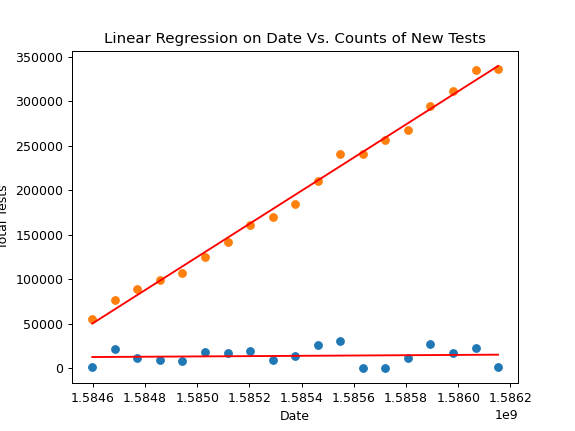

LinregressResult(slope=0.001703175763482781, intercept=-2686118.090350877, rvalue=0.08809733347069204, pvalue=0.7198674224218424, stderr=0.004670682650210992)


In [12]:
# experiment on Canada, new tests
countryLoc = test3mnth_df.loc[test3mnth_df['location'] == "Canada"]
display(countryLoc.head())

x_values = countryLoc['date_UE']
y_values = countryLoc['new_tests']
x_label = "Date"
y_label = "New Tests"
plot_linear_regression(x_values, y_values, 'Linear Regression on Date Vs. Counts of New Tests', 
                       x_label, y_label, (100,1))

In [13]:
# experiment on Canada, total tests
countryLoc = test3mnth_df.loc[test3mnth_df['location'] == "Canada"]
display(countryLoc.head())

x_values = countryLoc['date_UE']
y_values = countryLoc['total_tests_updated']
x_label = "Date"
y_label = "Total Tests"
plot_linear_regression(x_values, y_values, 'Linear Regression on Date Vs. Counts of New Tests', 
                       x_label, y_label, (100,1))

,location,date_updated,new_tests,total_tests_updated,date_UE
5177,Canada,2020-03-19,981.0,54956.0,1584597600
5178,Canada,2020-03-20,21858.0,76814.0,1584684000
5179,Canada,2020-03-21,12069.0,88883.0,1584770400
5180,Canada,2020-03-22,9941.0,98824.0,1584856800
5181,Canada,2020-03-23,8323.0,107147.0,1584943200


LinregressResult(slope=0.18616642300194933, intercept=-294948536.5736842, rvalue=0.9969879556514988, pvalue=2.541074009852743e-20, stderr=0.003512411461433772)
